Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Dataset Description


The dataset consists of `2357 images of malignant and benign oncological` diseases, which were formed from the **International Skin Imaging Collaboration (ISIC)**. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Importing Skin Cancer Data


### Importing all the important libraries

In [64]:
# Importing necessary libraries for Convolution Nural Network Model building and visualization

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import os
import PIL
import glob
import cv2
from tensorflow.keras.layers import Dense, Conv2D, Activation, Dropout, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Setting max display options
pd.set_option('display.max_colwidth', 2000)

# Importing library for ignoring warnning in the executed code
import warnings
warnings.filterwarnings("ignore")

# setting the backend of matplotlib to the 'inline' backend
%matplotlib inline

### GPU Utilization

In [18]:
## Checking about GPU Device

if tf.test.gpu_device_name():
     print((tf.test.gpu_device_name()))
else:
     print('install')

/device:GPU:0


In [19]:
# Consuming high GPU

gpu_opts=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=1)
sess=tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_opts))

In [20]:
# GPU and cuda working condition with Tensorflow.

print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [21]:
# Command for checking current Grapics card details and cuda versions 

! nvidia-smi

Wed Apr 28 16:40:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    23W /  75W |    199MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data Reading and Mounting of Google Drive for Google Colab

In [14]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Collab_Python_Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Dataset/Train") 
#data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Collab_Python_Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Dataset/Testg')

data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [16]:
# Displaying image counts from Train and Test folders 

# Number of images present in Train Folder
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

# Number of images present in Test Folder
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


- Here `Training` folder is containing **2239** images, while `Test` folder is containing **118** images

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [22]:
batch_size = 32
img_height = 180
img_width = 180

### Training Data Split into Training and Validation

Use 80% of the images for training, and 20% for validation.

In [23]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# Training Data Set Declaration - 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


**Above Dataset containes 80% of images for training**

In [25]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

## Declaring validation dataset here
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


**Above Dataset containes 20 % of Images for Testing**

**Below is List of all the classes of skin cancer and store them in a list.** 

In [26]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Data Visualization

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

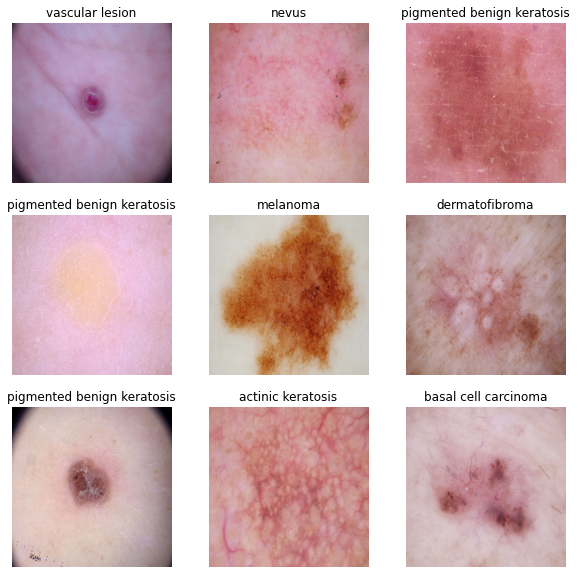

In [27]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Setting the figure size for visualization

plt.figure(figsize=(10, 10))


for images, labels in train_ds.take(1):
  for i in range(9):
    
    # Setting co-ordinates for sub-plots
    ax = plt.subplot(3, 3, i + 1)
    
    # Displaying the image of each class instance
    plt.imshow(images[i].numpy().astype("uint8"))
    
    # Setting the title for each class of image
    plt.title(class_names[labels[i]])
    
    # Supressing the axis labels
    plt.axis("off")

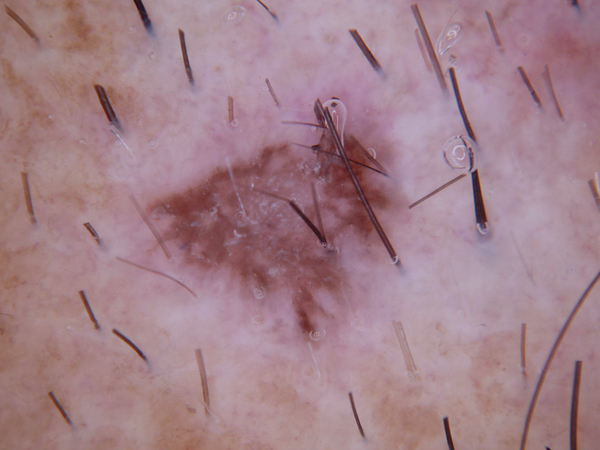

In [28]:
squamous_cell_carcinoma = list(data_dir_train.glob('squamous cell carcinoma/*'))
PIL.Image.open(str(squamous_cell_carcinoma[0]))

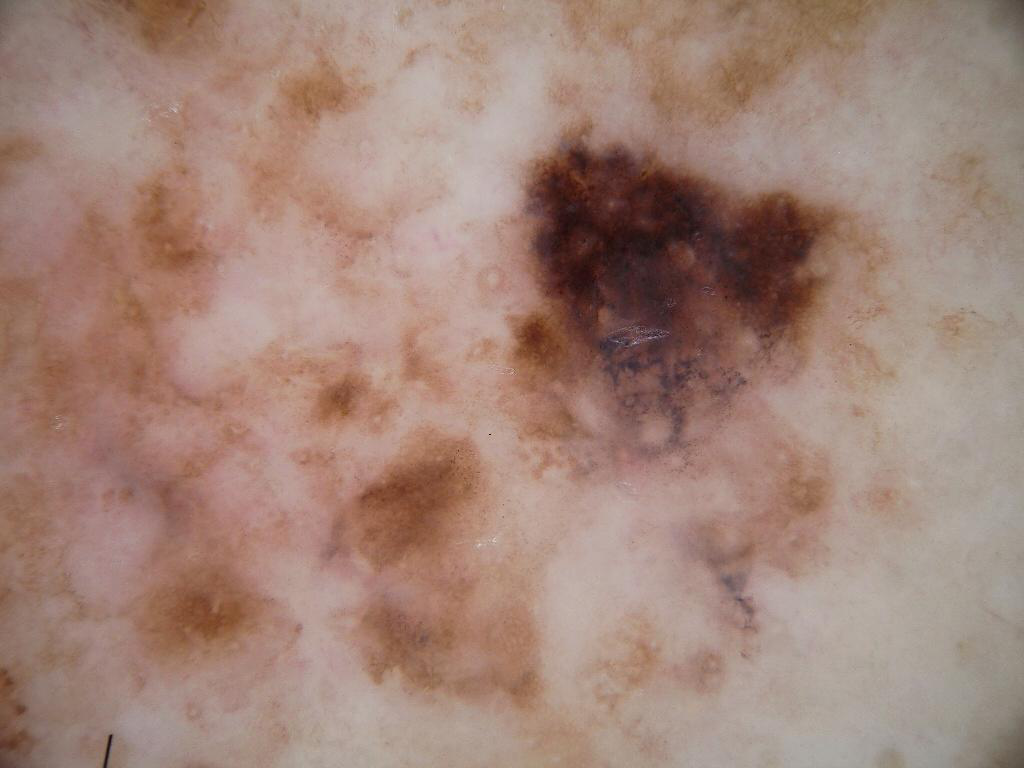

In [29]:
seborrheic_keratosis= list(data_dir_train.glob('seborrheic keratosis/*'))
PIL.Image.open(str(seborrheic_keratosis[0]))

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [35]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

### Performance Improvement

In [37]:
# Use autotune feature and create dataset cache to keep images in memory after they're loaded off disk during the first epoch
# Also use prefetch() to overlap data preprocessing and model execution while training

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building and Training

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [38]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [39]:
### To choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

### Train the model

In [41]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 234s 2s/step - loss: 2.2863 - accuracy: 0.1997 - val_loss: 1.9993 - val_accuracy: 0.3132
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9162 - accuracy: 0.3194 - val_loss: 1.6275 - val_accuracy: 0.4340
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4702 - accuracy: 0.4970 - val_loss: 1.4568 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2703 - accuracy: 0.5552 - val_loss: 1.4015 - val_accuracy: 0.5481
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2745 - accuracy: 0.5564 - val_loss: 1.4822 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1481 - accuracy: 0.5965 - val_loss: 1.4029 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1218 - accuracy: 0.6124 - val_loss: 1.4674 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing training results

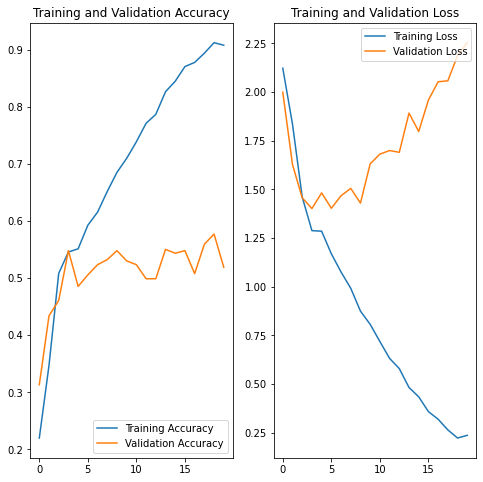

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- As you can see from the plots, training accuracy and validation accuracy model has achieved only around 51% accuracy on the validation set.
- This is case of overfitting so lets do the data augmentation
- When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. 
- This is called as overfitting. 
- Which means that the model getting difficult time to generalizing on a new dataset.

### Data Augmentation

In [43]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

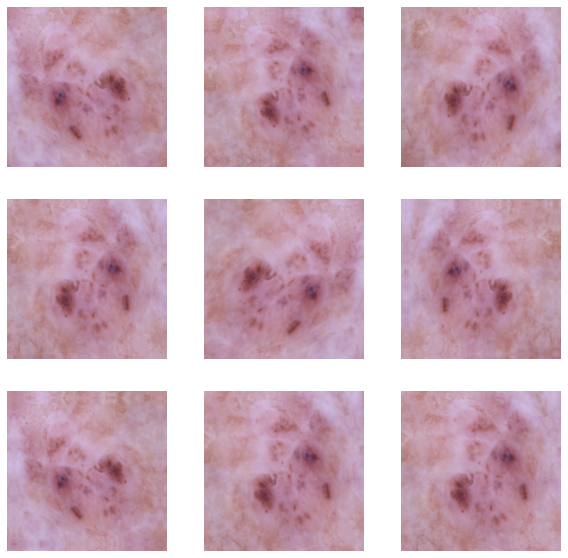

In [44]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

#Visualizing augmented data 


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

- Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.
- Let's create a new neural network using layers.Dropout, then train it using augmented images.

In [46]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [47]:
## Your code goes here

#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
#understanding the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [49]:
## Your code goes here, note: train your model for 20 epochs
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 38ms/step - loss: 2.1846 - accuracy: 0.1753 - val_loss: 1.9163 - val_accuracy: 0.3132
Epoch 2/20
56/56 [==============================] - 2s 35ms/step - loss: 1.8637 - accuracy: 0.3246 - val_loss: 1.6845 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.6982 - accuracy: 0.3832 - val_loss: 1.5589 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.5047 - accuracy: 0.4725 - val_loss: 1.4441 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.4039 - accuracy: 0.5043 - val_loss: 1.4474 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 1.3580 - accuracy: 0.5210 - val_loss: 1.4283 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 2s 35ms/step - loss: 1.3039 - accuracy: 0.5304 - val_loss: 1.3756 - val_accuracy: 0.5056
Epoch 8/20
56

### Visualizing the results

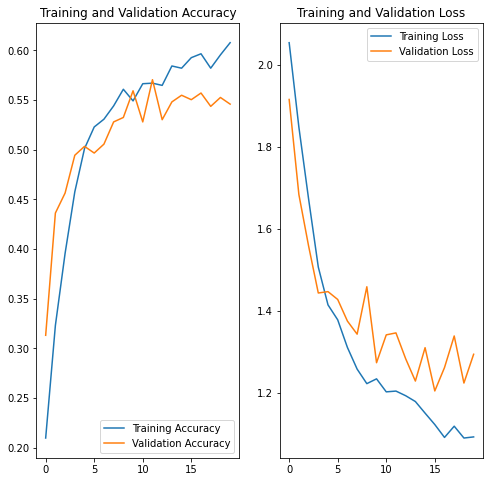

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- We can see from the plots, training accuracy and validation accuracy are better and the model has achieved only around 55% accuracy on the validation set.
- After the augmented data definitely the accuracy is better than the model build on fewer data .

### Find the distribution of classes in the training dataset.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [51]:
d={}
for i in class_names:
  d[i]=len(list(data_dir_train.glob(i+'/*')))
d

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [82]:
# Creating dataframe for class name and its count.

Data = pd.DataFrame({"Class_Name" : ["actinic keratosis", "vascular lesion", "basal cell carcinoma", "melanoma", "squamous cell carcinoma", "nevus", "dermatofibroma", "pigmented benign keratosis", "seborrheic keratosis"],
                     "Class_Count" : [114, 139, 376, 438, 181, 357, 95, 462, 77]})
Data.head()

,Class_Name,Class_Count
0,actinic keratosis,114
1,vascular lesion,139
2,basal cell carcinoma,376
3,melanoma,438
4,squamous cell carcinoma,181


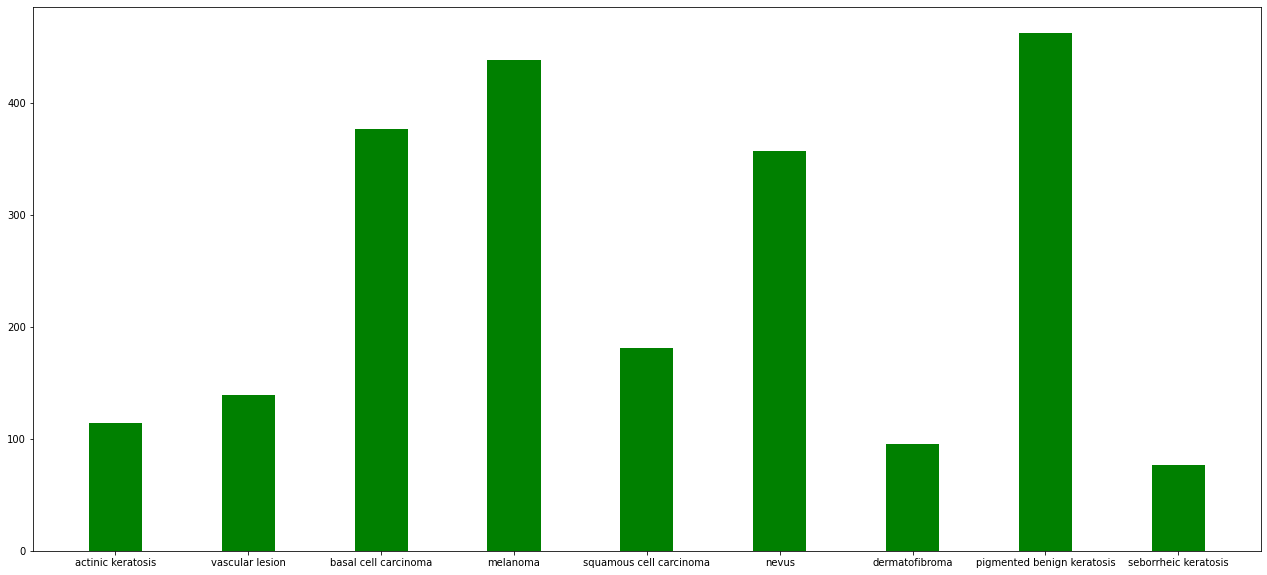

In [83]:
fig = plt.figure(figsize = (22, 10))
plt.bar(Data.Class_Name, Data.Class_Count, color = "green", width = 0.4)
plt.show()


#### - Which class has the least number of samples?

The class **seborrheic keratosis** has least number of samples: **77**

#### - Which classes dominate the data in terms proportionate number of samples?

The dominant classes in the samples are as below: 
1. **pigmented benign keratosis**
2. **melanoma**
3. **basal cell carcinoma**
4. **nevus**


### Rectify the class imbalance


In [52]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [54]:
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC9C237A90>: 100%|██████████| 500/500 [00:20<00:00, 24.81 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC5FF72F90>:   0%|          | 1/500 [00:00<00:52,  9.43 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC9C259690>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC5FEFDD50>:   0%|          | 1/500 [00:00<00:59,  8.34 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC5FEFD550>: 100%|██████████| 500/500 [00:20<00:00, 23.95 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBD121410D0>: 100%|██████████| 500/500 [01:28<00:00,  5.66 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FBD1201A5D0>: 100%|██████████| 500/500 [01:17<00:00,  6.41 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCF42AD890>: 100%|██████████| 500/500 [00:19<00:00, 25.46 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBC9C296A90>: 100%|██████████| 500/500 [00:42<00:00, 11.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCF40724D0>: 100%|██████████| 500/500 [00:20<00:00, 24.46 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBCF4155950>: 100%|██████████| 500/500 [00:21<00:00, 23.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [55]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [66]:
from glob import glob

In [68]:
# Creating list of image path for each images in the Training folder


path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010890.jpg_90ef1806-a4f5-493d-b9b7-fff5375c6700.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000313.jpg_0df1e4db-e302-4061-a6e7-83d46a293aa2.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010536.jpg_24dbe156-86ab-4b65-8bdb-a40887ab4a88.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010777.jpg_b2a428fd-9f5c-4a9f-ab4e-9da1826b6fe0.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000295.jpg_37b94420-e3fe-4a3a-89a2-277cc739a655.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International

In [70]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [71]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [72]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [73]:
df2['Label'].value_counts()

seborrheic keratosis          500
actinic keratosis             500
basal cell carcinoma          500
vascular lesion               500
melanoma                      500
squamous cell carcinoma       500
pigmented benign keratosis    500
dermatofibroma                500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [74]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [75]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height,img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [76]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create a model (Inclusion of normalization)

In [77]:
model = Sequential([
    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
    
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.2),
    
  layers.Flatten(),
    
  layers.Dense(512, activation='relu'),
    
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model (optimizer and loss function )

In [78]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
#summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 32)       

### Train  model

In [84]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
169/169 [==============================] - 49s 281ms/step - loss: 0.1134 - accuracy: 0.9497 - val_loss: 0.9122 - val_accuracy: 0.8062
Epoch 2/50
169/169 [==============================] - 50s 288ms/step - loss: 0.0917 - accuracy: 0.9557 - val_loss: 0.6740 - val_accuracy: 0.8478
Epoch 3/50
169/169 [==============================] - 49s 285ms/step - loss: 0.0882 - accuracy: 0.9579 - val_loss: 0.8323 - val_accuracy: 0.8322
Epoch 4/50
169/169 [==============================] - 48s 277ms/step - loss: 0.0924 - accuracy: 0.9609 - val_loss: 1.3580 - val_accuracy: 0.7357
Epoch 5/50
169/169 [==============================] - 48s 275ms/step - loss: 0.0919 - accuracy: 0.9583 - val_loss: 1.1747 - val_accuracy: 0.7580
Epoch 6/50
169/169 [==============================] - 48s 279ms/step - loss: 0.0936 - accuracy: 0.9564 - val_loss: 0.9813 - val_accuracy: 0.8151
Epoch 7/50
169/169 [==============================] - 48s 278ms/step - loss: 0.0989 - accuracy: 0.9540 - val_loss: 1.0032 - val_ac

### Visualize the model results

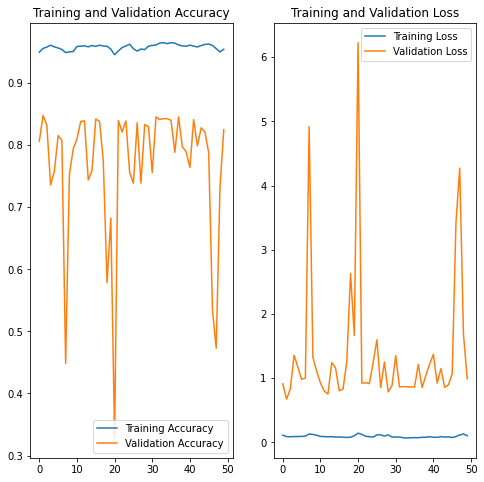

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



As we can see from the above plots, training accuracy and validation accuracy margin has been drastically reduced compared to the first and second models. 
The approximate accuracy achieved in the third model is as below:

- Training accuracy : **95%**
- Validation accuracy : **82%**

Reducing the class imbalance has helped here to get rid of overfitting in the model.

Finally, The data agumentation, dropout layers and reducing the class imbalance has helped build a generalized model. 